In [6]:
# to compare the dm2nu changes

In [7]:
# imports
from constants import pdm_constants as const
from config import config
from pone_aeff import Aeff
from dm2nu import DM2Nu
from atm_shower import Atm_Shower
from detectors import Detector
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

from limit_calc import Limits
from bkgrd_calc import Background
from signal_calc import Signal
from pdm import PDM
from scipy.interpolate import UnivariateSpline
from scipy.stats import chi2
from scipy.stats import *
from pone_aeff import Aeff
import pickle
from matplotlib import rc

import os
import shutil
def find_nearest(array, value: float):
    
    """ Returns: index of the nearest vlaue of an array to the given number
    --------------
    idx :  float
    """
    array = np.array(array)
    idx = (np.abs(array - value)).argmin()
    return idx

ModuleNotFoundError: No module named 'pandas'

In [2]:
# picture path
PICS = '../pics/'
name=[r'$\nu_{\mu}$', r"$\nu_e$", r"$\nu_{\tau}$"]  # ,r'$\nu_{e}$',r'$\nu_{\tau}$'
# Plotting standards
std_size = 6.  # Size of the plot
fontsize = 15.  # Fontsize in the plot

h_length=1.5  # Handle length for the legends
export_dpi = 500  # Dpi for the image export
color_pone='#7570b3'
color_ice='#e7298a'
color_combined='#33a02c'
color_thermal='#1f78b4'
color_unitary='k'
color_4='#1b9e77'
color_6='#d95f02'
color_km = '#1a9641'
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

NameError: name 'rc' is not defined

In [3]:
low_E_sigma = {
                'numu': [0.45, 0.35, 0.25, 0.15],
                'nue': [0.55, 0.45, 0.35, 0.25],
                'nutau': [0.55, 0.45, 0.35, 0.25]},
high_E_sigma = {
                'numu': [0.25, 0.15, 0.10, 0.09],
                'nue': [0.15, 0.12, 0.09, 0.07],
                'nutau': [0.15, 0.12, 0.09, 0.07] }

In [4]:
# Some example settings
#config['atmospheric showers']['interaction model'] = 'SIBYLL2.3c'
#config['atmospheric showers']['theta angles'] = np.linspace(0., 90., 91)|
#config['atmospheric showers']['particles of interest']=['nue']
#for i in name_part:
config['general']['detector'] = 'POne'
config['general']['pone type'] = 'old'
config['general']['density'] = "NFW" # "Burkert" # 'NFW'
config['general']["channel"] = "All" # i #"\[Tau]"   # "\\[Nu]\\[Mu]" 
config['pone']['smearing'] = 'unsmeared'
config['pone']['low E sigma'] = {'numu': 0.25,
                                 'nue': 0.25,
                                 'nutau': 0.25}
config['pone']['high E sigma'] = {'numu': 0.15,
                                 'nue': 0.07,
                                 'nutau': 0.07}
##low E sigma': {
##                'numu': [0.45, 0.35, 0.25, 0.15],
##                'nue': [0.55, 0.45, 0.35, 0.25],
##                'nutau': [0.55, 0.45, 0.35, 0.25]},
##            'high E sigma': {
##                'numu': [0.25, 0.15, 0.10, 0.09],
##                'nue': [0.15, 0.12, 0.09, 0.07],
##                'nutau': [0.15, 0.12, 0.09, 0.07]
#    pdm = PDM()
#    os.replace('../data/tmp_files/unsmeared/limits_results_POne_un_NFW.pkl', '../data/rescaled_pone_corrected/limits_results_POne_NFW_re_%s_ex.pkl' %(i))
#    os.replace('../data/tmp_files/unsmeared/signal_grid_POne_un_NFW.pkl', '../data/rescaled_pone_corrected/signal_POne_NFW_re_%s_ex.pkl' %(i))

In [5]:
surface_fluxe = pickle.load(open("../data/" +
                                                   "surf_store_v1.p", "rb"))

In [6]:
pdm = PDM()

unsmeared
POne
pone background
Starting Calculation
False
Finished Calculating Background


/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/pone_dm/dm2nu.py:355: RuntimeWarning: overflow encountered in exp
  dd = np.exp(d_2 / s_in(x)**2)
100%|██████████| 3/3 [00:00<00:00, 16.54it/s]


In [7]:
e_grid = pdm._shower_sim.egrid
e_width = pdm._shower_sim.ewidth

In [8]:
_bkgrd_ice_data = [
                        '../data/icecube_10year_ps/events/IC40_exp.csv',
                        '../data/icecube_10year_ps/events/IC59_exp.csv',
                        '../data/icecube_10year_ps/events/IC79_exp.csv',
                        '../data/icecube_10year_ps/events/IC86_I_exp.csv',
                        '../data/icecube_10year_ps/events/IC86_II_exp.csv',
                        '../data/icecube_10year_ps/events/IC86_III_exp.csv',
                        '../data/icecube_10year_ps/events/IC86_IV_exp.csv',
                        '../data/icecube_10year_ps/events/IC86_V_exp.csv',
                        '../data/icecube_10year_ps/events/IC86_VI_exp.csv',
                        '../data/icecube_10year_ps/events/IC86_VII_exp.csv',
                    ]

In [9]:
# Grids
mass_grid = config['simulation parameters']['mass grid']
sv_grid = config['simulation parameters']['sv grid']
m_4_id = find_nearest(mass_grid, 1e4)
m_6_id = find_nearest(mass_grid, 1e6)
m_3_id = find_nearest(mass_grid, 1e3)
m_5_id = find_nearest(mass_grid, 1e5)
sv_56 = find_nearest(sv_grid, 5.6e-23)
# The limit calculation


In [10]:
dphi_2=np.loadtxt(open("../data/m_1e2.csv"), delimiter = ",")
dphi_2[dphi_2[:,0].sort()]

dphi_4=np.loadtxt(open("../data/m_1e4.csv"), delimiter = ",")
dphi_4[dphi_4[:,0].sort()]

dphi_6=np.loadtxt(open("../data/m_1e6.csv"), delimiter = ",")
dphi_6[dphi_6[:,0].sort()]
#dphi_ice=np.loadtxt(open("../data/icecube.csv"), delimiter = ",")
#dphi_ice[dphi_ice[:,0].sort()]

array([[[4.71523093e+04, 1.53459280e-10],
        [5.60497613e+04, 1.96288387e-10],
        [7.04102047e+04, 2.26695859e-10],
        [9.25043476e+04, 2.62434648e-10],
        [1.15056452e+05, 2.83833139e-10],
        [1.48558994e+05, 3.20599461e-10],
        [1.93633804e+05, 3.92318799e-10],
        [2.52276868e+05, 5.18154640e-10],
        [3.09297992e+05, 6.89257983e-10],
        [3.56977496e+05, 9.89944054e-10],
        [3.87710108e+05, 2.29779058e-09],
        [4.53992662e+05, 3.17683977e-09],
        [4.82168854e+05, 4.38613018e-09],
        [5.21973227e+05, 6.05574703e-09],
        [5.73914043e+05, 9.73019151e-09],
        [6.31028068e+05, 7.24924411e-09],
        [6.93825892e+05, 2.03091762e-08],
        [7.45239618e+05, 1.59696980e-08],
        [7.98043927e+05, 1.22436833e-08],
        [8.51217508e+05, 1.76706590e-09],
        [9.15185392e+05, 1.37202694e-09],
        [9.96285866e+05, 1.14931629e-10]]])

In [11]:
dphi_4=UnivariateSpline(dphi_4[:,0],dphi_4[:,1],k=1,s=0,ext=1)
#mass_grid[0],sv_grid[-1],mass_grid[-1],sv_grid[-1]
#dphi_ic=UnivariateSpline(dphi_ice[:,0],dphi_ice[:,1],k=1,s=0,ext=1)
dphi_6=UnivariateSpline(dphi_6[:,0],dphi_6[:,1],k=1,s=0, ext=1)
#dphi_2=UnivariateSpline(dphi_2[:,0],dphi_2[:,1],k=1,s=0, ext=1)


In [12]:


shower_flux = pickle.load(open('../data/shower.p','rb'))
shower_po = shower_flux[2][45]['numu']
surface_fluxe_ice = pickle.load(open("../data/surf_store_v1.p", "rb"))
shower_ice = surface_fluxe_ice[20][3] # background fluxes at 20° ----



In [13]:
np.logspace(2,6,53)[26]
sv_7 = find_nearest(sv_grid, 7e-22)
m_2_id = find_nearest(mass_grid, 1e2)

/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/pone_dm/dm2nu.py:355: RuntimeWarning: overflow encountered in exp
  dd = np.exp(d_2 / s_in(x)**2)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


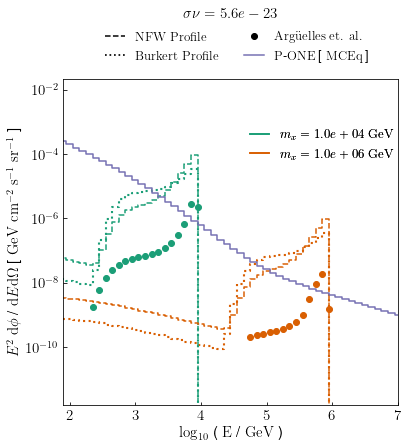

In [14]:
from asyncio import constants


figure, ax1 = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True) 
#  $<\sigma\nu>=%.1e$ $cm^{3}s^{-1}$' ,sv_grid[sv_56]
#label=r'$m_{x}=1.0e+04$ $\textrm{GeV} (Carlos$ $et.al)$'
#label=r'$m_{x}=1.0e+06$ $\textrm{\textrm{\textrm{GeV}}} (Carlos$ $et.al)$'
ax1.set_title(r'$\sigma\nu = %.1e$' % (sv_grid[sv_56]), y=1.17, fontsize=fontsize)
#ax1.step(np.log10(e_grid), dphi_2(e_grid),'o', color="y")
plt.step(np.log10(e_grid), dphi_4(e_grid), 'o', color=color_4)
plt.step(np.log10(e_grid), dphi_6(e_grid), 'o',color=color_6)
#ax1.step(e_grid, (pdm._dm_nu.extra_galactic_flux(e_grid,mass_grid[0],sv)) * e_grid**2.,'-.',
#         label=r'$m_{x}$ = %.1e , $<\sigma\nu>$ = %.1eGeV Sim'%(mass_grid[0],sv))
burkert_flux_4 = (pdm._dm_nu.extra_galactic_flux_burkert(e_grid,mass_grid[m_4_id],sv_grid[sv_56]))# + pdm._dm_nu.galactic_flux(e_grid,mass_grid[m_4_id],sv_grid[sv_56], 2 , 2.3e23)
burkert_flux_6 = (pdm._dm_nu.extra_galactic_flux_burkert(e_grid,mass_grid[m_6_id],sv_grid[sv_56]))# + pdm._dm_nu.galactic_flux(e_grid,mass_grid[m_6_id],sv_grid[sv_56], 2 , 2.3e23)
nfw_flux_2 = (pdm._dm_nu.extra_galactic_flux_nfw(e_grid,mass_grid[m_2_id],sv_grid[sv_7]))
nfw_flux_3 = (pdm._dm_nu.extra_galactic_flux_nfw(e_grid,mass_grid[m_3_id],sv_grid[sv_56]))# + pdm._dm_nu.galactic_flux(e_grid,mass_grid[m_3_id],sv_grid[sv_56], 2 , 2.3e23)
nfw_flux_4 = (pdm._dm_nu.extra_galactic_flux_nfw(e_grid,mass_grid[m_4_id],sv_grid[sv_56]))# + pdm._dm_nu.galactic_flux(e_grid,mass_grid[m_4_id],sv_grid[sv_56], 2 , 2.3e23)
nfw_flux_6 = (pdm._dm_nu.extra_galactic_flux_nfw(e_grid,mass_grid[m_6_id],sv_grid[sv_56]))# + pdm._dm_nu.galactic_flux(e_grid,mass_grid[m_6_id],sv_grid[sv_56], 2 , 2.3e23)
#nfw_flux_5 = (pdm._dm_nu.extra_galactic_flux_nfw(e_grid,mass_grid[m_5_id],sv_grid[sv_7])) + pdm._dm_nu.galactic_flux(e_grid,mass_grid[m_5_id],sv_grid[sv_56], 2 , 2.3e23)
#ax1.step(np.log10(e_grid), burkert_flux_4 * e_grid**2., color=color_4, linest

#nfw_flux_2 = (pdm._dm_nu.extra_galactic_flux_c(e_grid,mass_grid[m_2_id],sv_grid[sv_7]))
#nfw_flux_3 = (pdm._dm_nu.extra_galactic_flux_c(e_grid,mass_grid[m_3_id],sv_grid[sv_7]))# + pdm._dm_nu.galactic_flux(e_grid,mass_grid[3],sv_grid[sv_56], 2 , 2.3e23)
#nfw_flux_4 = (pdm._dm_nu.extra_galactic_flux_c(e_grid,mass_grid[m_4_id],sv_grid[sv_7]))# + pdm._dm_nu.galactic_flux(e_grid,mass_grid[26],sv_grid[sv_56], 2 , 2.3e23)
#nfw_flux_6 = (pdm._dm_nu.extra_galactic_flux_c(e_grid,mass_grid[m_6_id],sv_grid[sv_7]))# + pdm._dm_nu.galactic_flux(e_grid,mass_grid[-1],sv_grid[sv_56], 2 , 2.3e23)
#nfw_flux_5 = (pdm._dm_nu.extra_galactic_flux_c(e_grid,mass_grid[m_5_id],sv_grid[sv_7]))


ax1.step([0],[0],'--', color='k', label=r'$\textrm{NFW Profile}$' )
ax1.step([0],[0],':' , lw=1.7, color='k', label=r'$\textrm{Burkert Profile}$' )
plt.plot([0],[0],'o', color='k', label=r'$\textrm{Argüelles et. al.}$' )
# 4*pi factor from now on is because of the plot y axis not being diffused meaning the d\Omega integral hasnt been done ------------------------
ax1.step(np.log10(e_grid), burkert_flux_4 * e_grid**2 / (4*np.pi), ':', color=color_4, lw=2.1
         )
ax1.step(np.log10(e_grid), burkert_flux_6 * e_grid**2 / (4*np.pi), ':', color=color_6, lw=2.1
         )

ax1.step(np.log10(e_grid), nfw_flux_4 * e_grid**2 / (4*np.pi), '--', color=color_4
        )
#ax1.step(np.log10(e_grid), nfw_flux_5 * e_grid**2., '*', color='b',
#         )
ax1.step(np.log10(e_grid), nfw_flux_6 * e_grid**2 / (4*np.pi), '--', color=color_6  # type: ignore
         )
ax1.step(np.log10(e_grid), (shower_po + pdm._Detector.astro_flux())*e_grid**2, color=color_pone, label=r'$\textrm{P}$-$\textrm{ONE}$ [ $\textrm{MCEq}$ ]') # Karlsruhe Corsika
# ax1.step(np.log10(e_grid), (shower_ice + pdm._Detector.astro_flux())*e_grid**2, color=color_ice, label=r'IceCube')
#ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel(r'$\log_{10}$ ( $\textrm{E}$ / $\textrm{GeV}$ )', fontsize=fontsize)
ax1.set_ylabel(r'\textbf{$E^2$} $\textrm{d}$\textbf{$\phi$} / \textrm{d}\textbf{$E$}\textrm{d}$\Omega$   [ $\textrm{GeV}$ $\textrm{cm}^{-2}$ $\textrm{s}^{-1}$ $\textrm{sr}^{-1}$ ]', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax1.set_xlim(1.9, 7)
#ax1.set_ylim(1.1e-9,1.2e-5)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(0.95, +1.1),
                 ncol=2, fontsize=fontsize-2, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)
legend_elements_s = [
        #Line2D([0], [0], color='y', linestyle='-', lw=1.3),
        #Line2D([0], [0], color=color_4,linestyle='-',lw=1.3),
        Line2D([0], [0], color=color_4,linestyle='-',lw=1.7),
        #Line2D([0], [0], color='b', linestyle='-', lw=1.3),
        Line2D([0], [0], color=color_6, linestyle='-', lw=1.7)
                  ]
labels_s = [
        #r'$m_{x}=%.1e$ $\textrm{GeV}$ ' %(mass_grid[m_2_id]),
        #r'$m_{x}=%.1e$ $\textrm{GeV}$ ' %(mass_grid[m_2_id]),
        r'$m_{x}=%.1e$ $\textrm{GeV}$ ' %(mass_grid[m_4_id]),
        #r'$m_{x}=%.1e$ $\textrm{GeV}$ ' %(mass_grid[m_5_id]),
        r'$m_{x}=%.1e$ $\textrm{GeV}$ ' %(mass_grid[m_6_id])
          ]
lgd2 = ax1.legend(legend_elements_s, labels_s, loc=7, bbox_to_anchor=(1.02, +0.8),
             ncol=1, fontsize=fontsize-2, handlelength=h_length,
             fancybox=True, frameon=False)
ax1.add_artist(lgd2)
# ---------------------------------------------
# Showing the image

plt.show()
figure.savefig(PICS + "Final_flux"+".png",
               bbox_inches='tight', dpi=export_dpi, facecolor='white')